STUDENT PERFORMANCE INDICATOR

Life cycle of ML Pojects:

- Problem Understanding
- Data Collection
- Data Checks to Perform
- Exploratory Data Analysis(EDA)
- Data Preprocessing
- Model Training
- Model Selection

1) Problem Understanding

This project is to understand how students' test scores are affected by variables like test preparation, lunc and parental level of education

2.1) Import data and required packages

In [32]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [33]:
#Load the Data

df = pd.read_csv('data/stud.csv')

In [34]:
df.head

<bound method NDFrame.head of      gender race_ethnicity parental_level_of_education         lunch  \
0    female        group B           bachelor's degree      standard   
1    female        group C                some college      standard   
2    female        group B             master's degree      standard   
3      male        group A          associate's degree  free/reduced   
4      male        group C                some college      standard   
..      ...            ...                         ...           ...   
995  female        group E             master's degree      standard   
996    male        group C                 high school  free/reduced   
997  female        group C                 high school  free/reduced   
998  female        group D                some college      standard   
999  female        group D                some college  free/reduced   

    test_preparation_course  math_score  reading_score  writing_score  
0                      none      

In [35]:
df.shape

(1000, 8)

#Write brief data dictionary

Data checks to perform:

1.Missing Vlaues
2. Duplicates
3. Data types 
4. Check number of unique values
5. Check basic stats of dataset
6. Check various categories present in the categorical columns 

In [36]:
#Missing Value

df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

There are no missing values

In [37]:
#Check for Duplicates

df.duplicated().sum()

0

There are no duplicates

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


#Check unique values

In [39]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [40]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [41]:
df['total_score'] = df['math_score']+df['reading_score'] + df['writing_score']
df['average'] = df['total_score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [42]:
reading_full = df[df['reading_score']==100]['average'].count()
writing_full = df[df['writing_score']==100]['average'].count()
math_full = df[df['math_score']==100]['average'].count()


print(f'number of students with full marks in math:{math_full}')
print(f'number of students with full marks in writing: {writing_full}')
print(f'number of students with full marks in reading: {reading_full}')


number of students with full marks in math:7
number of students with full marks in writing: 14
number of students with full marks in reading: 17


In [43]:
reading_full = df[df['reading_score']<=20]['average'].count()
writing_full = df[df['writing_score']<=20]['average'].count()
math_full = df[df['math_score']<=20]['average'].count()


print(f'number of students with -marks in math:{math_full}')
print(f'number of students with 2marks in writing: {writing_full}')
print(f'number of students with 2marks in reading: {reading_full}')

number of students with -marks in math:4
number of students with 2marks in writing: 3
number of students with 2marks in reading: 1


#Visualize the data using various charts

<Axes: xlabel='average', ylabel='Count'>

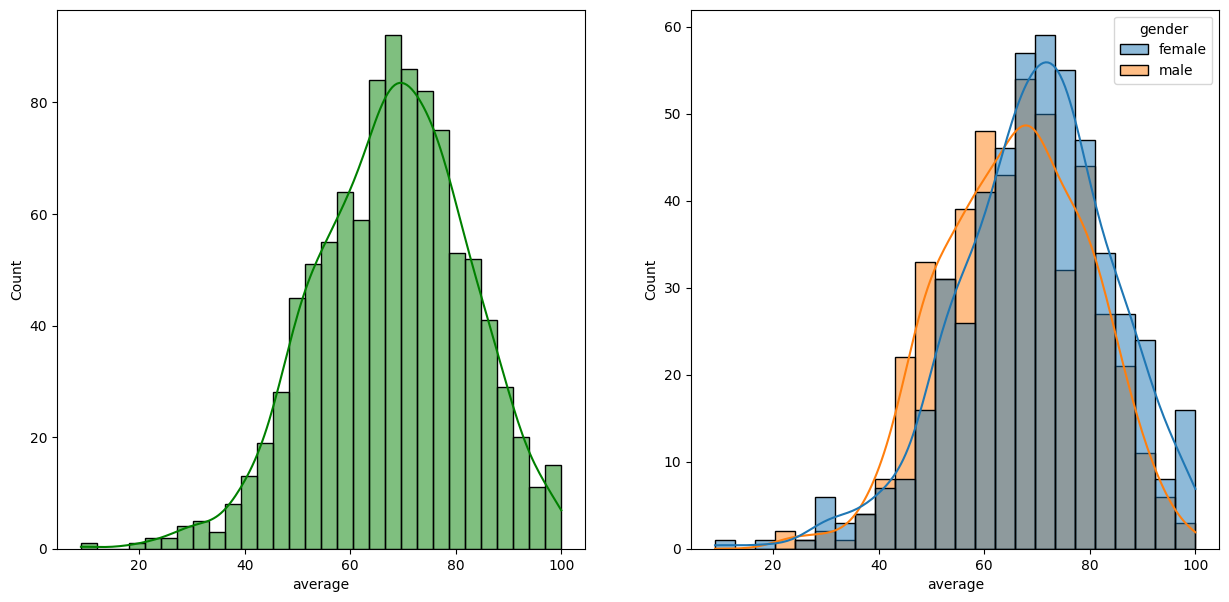

In [44]:
fig, axs = plt.subplots(1,2, figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='average',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average',kde=True,hue='gender')

we can see that femail students tend to perfrom better than female students in regards to average grades

<Axes: xlabel='average', ylabel='Count'>

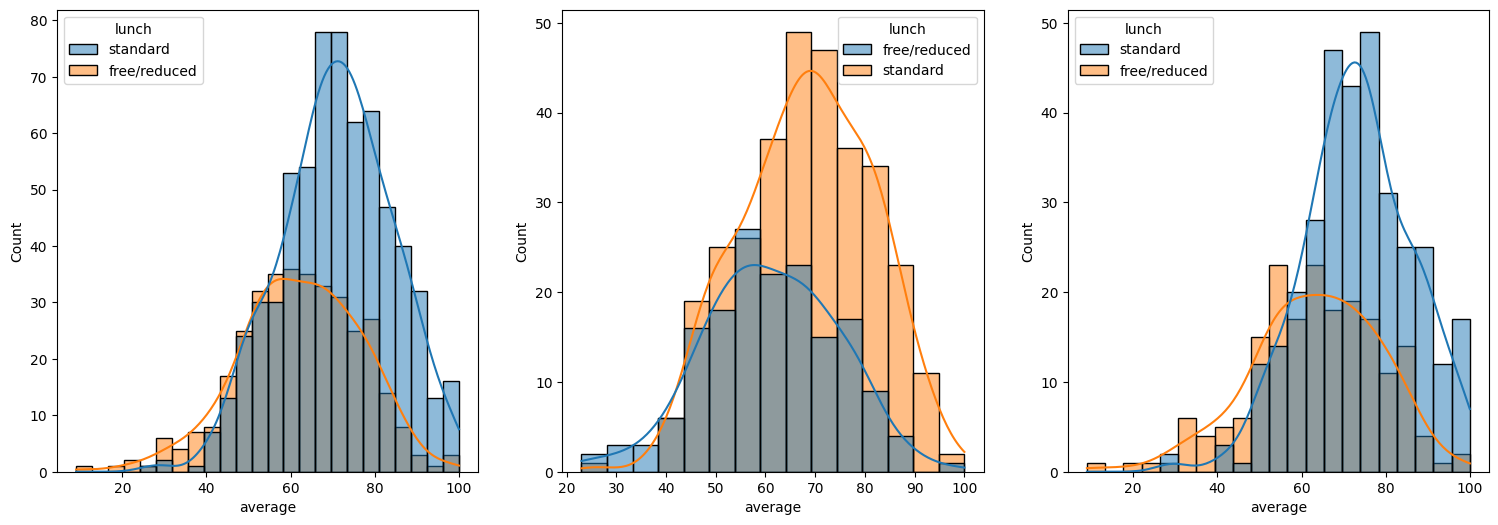

In [45]:
plt.subplots(1,3, figsize= (25,6))
plt.subplot(141)
sns.histplot(data=df, x='average',kde='True', hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df['gender']=='male'], x='average', kde=True, hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df['gender']=='female'], x='average', kde=True, hue='lunch')


We can see that across the board students who have a standard lunch perform better. This could be due to a socio-economic factor of standard lunch students having better resources/support. 

Both Males and Females perform better with a standard lunch

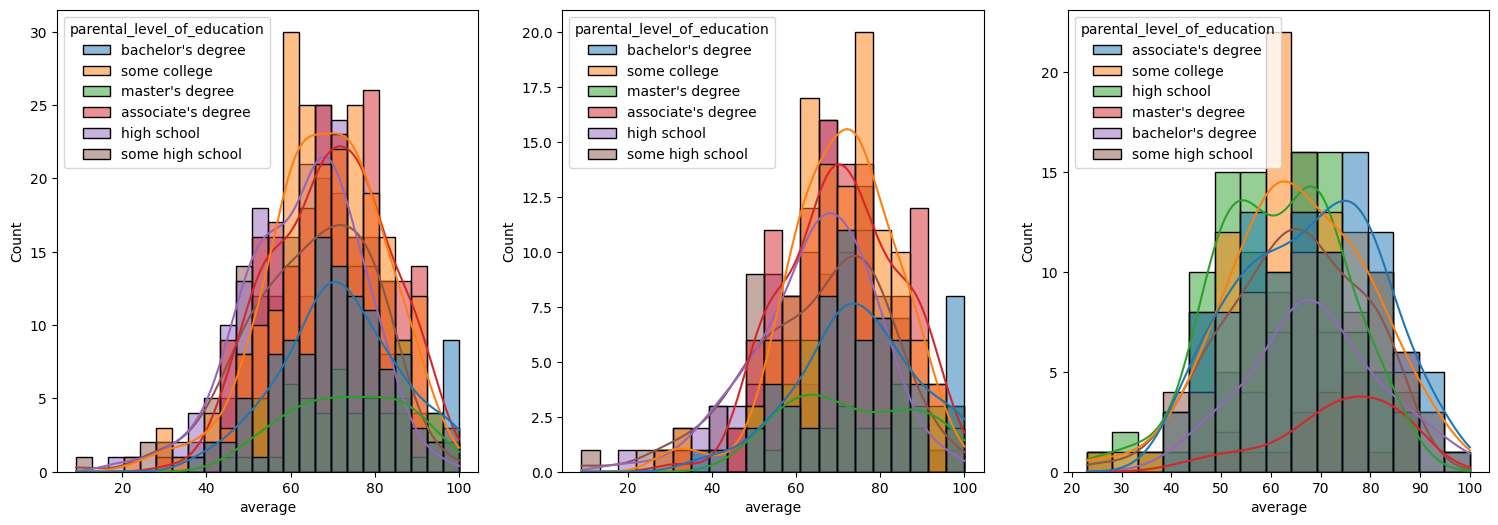

In [48]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax = sns.histplot(data=df, x='average',kde=True, hue='parental_level_of_education')
plt.subplot(142)
ax = sns.histplot(data=df[df.gender=='female'], x='average',kde=True,hue='parental_level_of_education')
plt.subplot(143)
ax = sns.histplot(data=df[df.gender=='male'], x='average',kde=True,hue='parental_level_of_education')
plt.show()